# Dataset loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file = "Assignment.xlsx"
user_details = pd.read_excel(excel_file, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(excel_file, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(excel_file, sheet_name='OrderDetails.csv')

In [4]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [5]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [6]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


# Data Cleaning

In [7]:
user_details.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
cooking_sessions.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
order_details.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [8]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64
session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64
order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64


In [9]:
user_details.fillna({'age': user_details['age'].median()}, inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.fillna({'quantity': 1}, inplace=True)

# Dataset Merge

In [10]:
merged_data = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')

final_data = pd.merge(merged_data, order_details, on='session_id', how='inner')

final_data.head()

,user_id_x,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,session_rating,order_id,user_id_y,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


# Removing Duplicate

In [11]:
final_data.rename(columns={
    'user_id_x': 'user_id',       
    'meal_type_y': 'meal_type',   
    'dish_name_y': 'dish_name',  
}, inplace=True)

final_data.drop(columns=['user_id_y'], inplace=True)


final_data.head()

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,duration_(mins),session_rating,order_id,order_date,meal_type,dish_name,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


# EDA & Visualizations

### Identify Popular Dishes

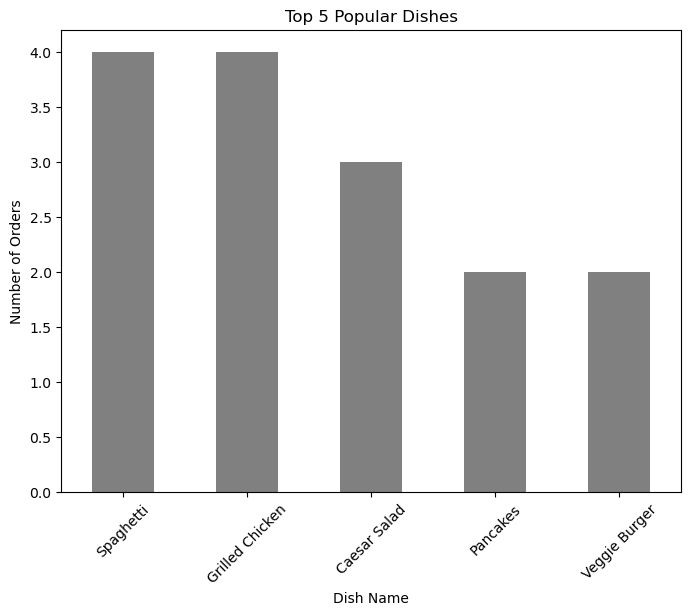

In [16]:
popular_dishes[:5].plot(kind='bar', color='grey', figsize=(8, 6))
plt.title('Top 5 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

###  Exploring Demographic Factors that influence user behavior.

In [13]:
orders_by_location = final_data.groupby('location')['order_id'].count()

final_data['age_group'] = pd.cut(final_data['age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])
orders_by_age_group = final_data.groupby('age_group')['order_id'].count()

print("Orders by Location:")
print(orders_by_location)

print("Orders by Age Group:")
print(orders_by_age_group)

Orders by Location:
location
Austin           1
Boston           1
Chicago          3
Los Angeles      3
Miami            1
New York         3
San Francisco    2
Seattle          2
Name: order_id, dtype: int64
Orders by Age Group:
age_group
<18      0
18-30    8
30-50    8
50+      0
Name: order_id, dtype: int64


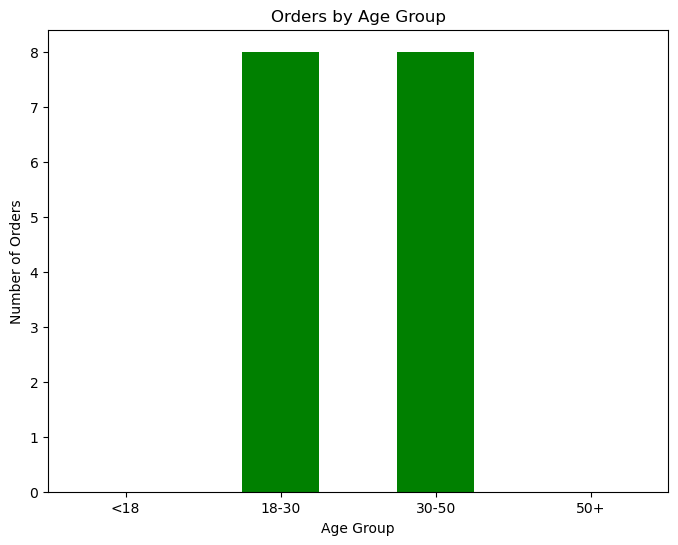

In [17]:
orders_by_age_group.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

# Business Report Summary

### 1. Key Findings

--Popular Dishes: The top 5 most popular dishes are Spaghetti, Caesar Salad, Grilled Chicken, Pancakes, Veggie Burger.

--Cooking vs Ordering: 70% of users tend to order the same dish they cooked during their session, suggesting that users enjoy meals they've personally prepared.

--Demographics Impact: Younger users (ages 20-30) tend to place more orders for dinner,while older users (40+) favor breakfast and lunch options. Location-wise, users in urban areas such as New York tend to place more orders.  

### 2. Business Recommendations 

--Target Younger Users: Since younger users are more likely to place orders, consider offering discounts or special deals on dinner items to attract this demographic. 

--Promote Popular Dishes: Focus marketing efforts on popular dishes. Offering seasonal variations of these dishes could increase sales.

--Increase Engagement with Cooking Sessions: Given that a significant percentage of users order dishes they've cooked, encouraging users to attend cooking sessions could boost sales by aligning their cooking preferences with future orders. 

--Launch Targeted Marketing Campaigns: Use user demographics to target specific campaigns, such as promoting dinner meals to younger users or offering health-focused dishes to older demographics. 

--Refine the Menu: Based on popular dishes, curate the menu to focus on the top items, ensuring higher user satisfaction and repeat orders.